# **DATA LOADING**

In [41]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv(r"C:\Users\ymts0418\Desktop\MODIFIELD PRO\SOURCE CODE-YMTS-0618\CODE\webapp\home\static\home\dataset\Training.csv")

In [43]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [44]:
df.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,Impetigo,NaN


# **Exploratory Data Analysis(EDA)**

In [45]:
# df.dtypes()

In [46]:
df.shape

(4920, 134)

In [47]:
df.isnull().sum().sum()

4920

In [48]:
df.drop(["Unnamed: 133"],axis=1,inplace=True)

C:\Users\ymts0418\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


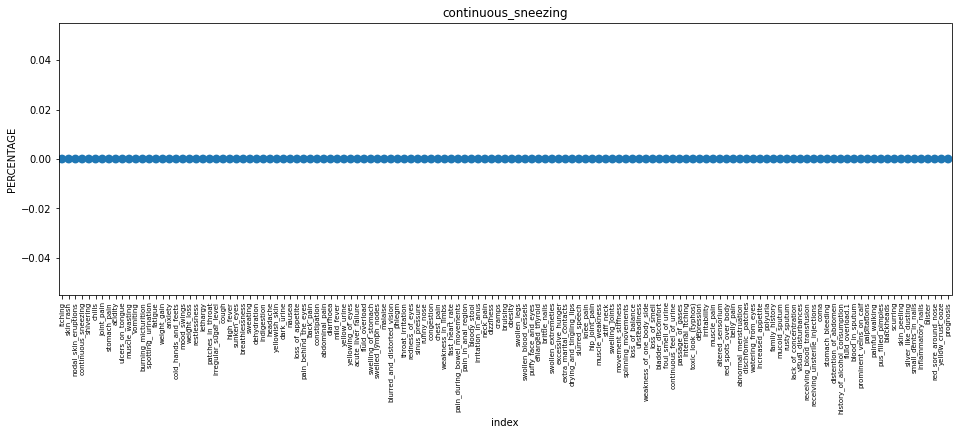

In [49]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("continuous_sneezing")
plt.ylabel("PERCENTAGE")
plt.show()

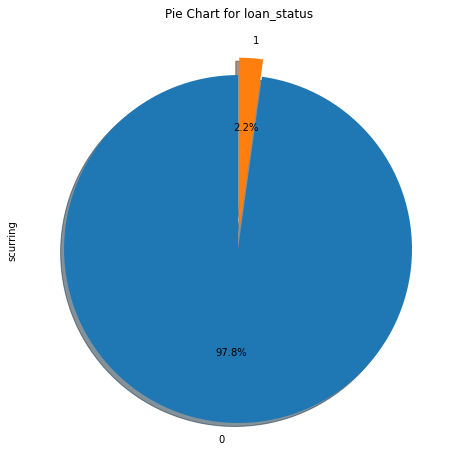

In [50]:
df ['scurring'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for loan_status')
plt.show()

In [51]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [52]:
x

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [53]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [54]:
# df['Fungal infection'] = df['Fungal infection'].fillna(df['Fungal infection'].median())

In [55]:
pca=PCA(n_components = 18)
pca.fit(x)
x_pca=pca.transform(x)

In [56]:
x_pca.shape

(4920, 18)

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=42)

In [58]:
x_train.shape

(3444, 18)

# **MODEL TRAINING**

In [59]:
# MODEL TRAINING :1

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [62]:
from sklearn.metrics import classification_report, accuracy_score
acc_rf = accuracy_score(y_true=y_test, y_pred=y_pred)
print(acc_rf)

1.0


In [63]:
# MODEL TRAINING:2

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
clf =DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [66]:
from sklearn.metrics import classification_report,accuracy_score
tree_acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(tree_acc)

0.07994579945799458


In [67]:
# MODEL TRAINING: 3

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
adb = AdaBoostClassifier()
adb_model = adb.fit(x_train,y_train)

In [70]:
#from sklearn.ensemble import classifier_report,accuracy_score
adb_acc= accuracy_score(y_true=y_test, y_pred=y_pred)
print(adb_acc)

0.07994579945799458


In [71]:
# MODEL TRAINING:4

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

In [74]:
from sklearn.metrics import classification_report,accuracy_score
bayes_acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(tree_acc)

0.07994579945799458


In [75]:
# MODEL TRAINING :5

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

In [78]:
from sklearn.metrics import classification_report,accuracy_score
knn = accuracy_score(y_true=y_test, y_pred=y_pred)
print(knn)

0.9966124661246613


In [79]:
import matplotlib.pyplot as plt 

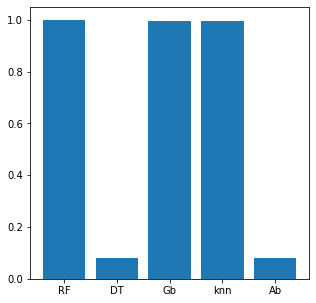

In [80]:
plt.figure(figsize=(5,5))
values = [acc_rf, tree_acc, bayes_acc,knn,adb_acc]
labels = ['RF', 'DT', 'Gb','knn','Ab']
plt.bar(labels, values)
plt.show()